In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.cm import ScalarMappable
import matplotlib.image as mpimg
import numpy as np
import pickle

In [2]:
img = mpimg.imread("neuron_model.png")

with open('single_trace.pkl', 'rb') as f:
    trace = pickle.load(f)

plt.rcParams.update({
    "text.usetex": True,       # use full LaTeX
    "font.family": "serif",
    "font.size": 14
})


In [3]:
f = trace['f']
rate_approx = trace['rate_approx']
rate_envelope = trace['rate_envelope']
acceleromter = trace['accelerometer']
steps = 100
ms_per_step = 300
input_step = 50

min_step = 40
max_step = 60
time = np.arange(min_step * ms_per_step, max_step * ms_per_step, 1)

spks_idx = np.where(trace['spks'] == 1)[1]
spks_times = spks_idx[(spks_idx > (min_step * ms_per_step)) *  (spks_idx < (max_step * ms_per_step))] * 1e-3

In [4]:
tau_plast_short = 500 * 1e-3
tau_plast_long = 750 * 1e-3
delta_t = np.arange(-4, 4, 0.1)
w_max = 0.5

weights = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
weights.reverse()

/var/folders/63/bj4sy42d73zfhb8t5d3xm1jh0000gn/T/ipykernel_3028/702957798.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


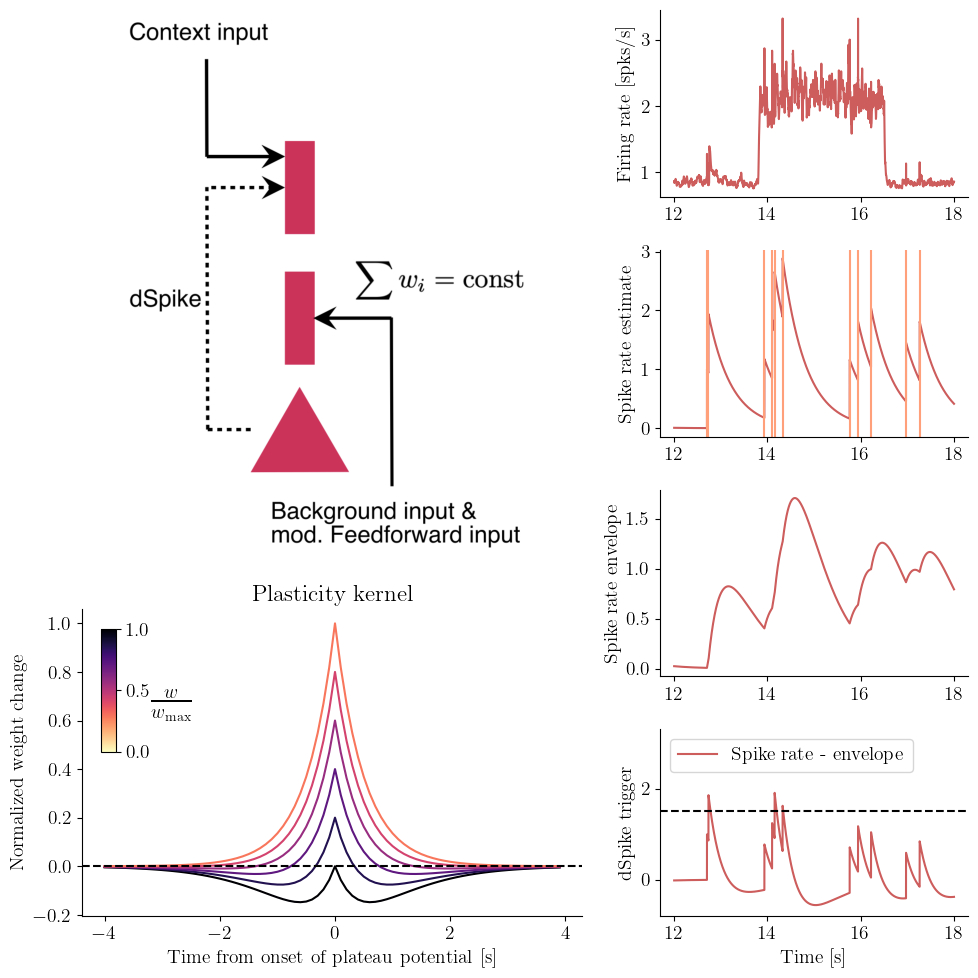

In [5]:
mosaic= '''
AAACC
AAACC
AAADD
AAADD
AAAEE
BBBEE
BBBFF
BBBFF
'''


fig, ax = plt.subplot_mosaic(mosaic, figsize=(10,10))


# Overview figure
ax['A'].imshow(img)
for spine in ax['A'].spines.values():
    spine.set_visible(False)
ax['A'].set_xticks([])
ax['A'].set_yticks([])



cmap = plt.cm.magma  # choose your gradient
colors = cmap(np.linspace(0, 1, len(weights) + 2))
sm = ScalarMappable(cmap=cmap.reversed())

ax['B'].set_title('Plasticity kernel')
for i, color in enumerate(colors[:len(weights)]):
    ax['B'].plot(delta_t, np.exp( -  np.abs(delta_t) / tau_plast_short) - weights[i] / w_max * np.exp( - np.abs(delta_t) / tau_plast_long), color=color)
ax['B'].spines['top'].set_visible(False)
ax['B'].spines['right'].set_visible(False)
ax['B'].set_xlabel('Time from onset of plateau potential [s]')
ax['B'].set_ylabel('Normalized weight change')
ax['B'].axhline(0, color='k', ls='--')

cax = inset_axes(ax['B'],
                 width="3%",        # width relative to parent
                 height="40%",      # height relative to parent
                 loc="upper left", # corner placement
                 borderpad=1)
cbar = plt.colorbar(sm, cax)
cbar.set_label(r'$\frac{w}{w_{\mathrm{max}}}$', rotation=0, labelpad=15, fontsize=20)


# Firing rate
ax['C'].plot(1e-3 * time, 50 * f.flatten()[min_step * ms_per_step: max_step * ms_per_step], color='indianred')
ax['C'].set_ylabel('Firing rate [spks/s]')
ax['C'].spines['top'].set_visible(False)
ax['C'].spines['right'].set_visible(False)

# Firing rate estimate
ax['D'].sharex(ax['C'])
ax['D'].plot(1e-3 * time, rate_approx.flatten()[min_step * ms_per_step: max_step * ms_per_step], color='indianred')
for spk_time in spks_times:
    ax['D'].axvline(spk_time,  color='lightsalmon')
ax['D'].set_ylabel('Spike rate estimate')
ax['D'].spines['top'].set_visible(False)
ax['D'].spines['right'].set_visible(False)

# Firing rate envelope
ax['E'].sharex(ax['C'])
ax['E'].plot(1e-3 * time, rate_envelope.flatten()[min_step * ms_per_step: max_step * ms_per_step], color='indianred')
ax['E'].set_ylabel('Spike rate envelope')
ax['E'].spines['top'].set_visible(False)
ax['E'].spines['right'].set_visible(False)


# Firing rate envelope
ax['F'].sharex(ax['C'])
ax['F'].plot(1e-3 * time, acceleromter.flatten()[min_step * ms_per_step: max_step * ms_per_step], color='indianred', label='Spike rate - envelope')
ax['F'].set_ylabel('dSpike trigger')
ax['F'].set_ylim([-0.8, 3.3])
ax['F'].axhline(1.5, color='k', ls='--')
ax['F'].set_xlabel('Time [s]')
ax['F'].legend(loc='upper left')
ax['F'].spines['top'].set_visible(False)
ax['F'].spines['right'].set_visible(False)


plt.tight_layout()

plt.savefig('overview_1.png')

In [6]:
spks_idx = np.where(trace['spks'] == 1)[1]
spks_times = spks_idx[(spks_idx > (min_step * ms_per_step)) *  (spks_idx < (max_step * ms_per_step))] * 1e-3

In [7]:
spks_times

array([12.703, 12.735, 13.934, 14.099, 14.153, 14.324, 15.762, 15.941,
       16.22 , 16.97 , 17.262])

In [8]:
weights.reverse()

In [9]:
weights

[0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [10]:
colors.shape

(8, 4)

In [11]:
cmap = plt.cm.magma  
colors = cmap(np.linspace(0, 1, len(weights)))

In [12]:
colors

array([[1.46200e-03, 4.66000e-04, 1.38660e-02, 1.00000e+00],
       [2.32077e-01, 5.98890e-02, 4.37695e-01, 1.00000e+00],
       [5.50287e-01, 1.61158e-01, 5.05719e-01, 1.00000e+00],
       [8.68793e-01, 2.87728e-01, 4.09303e-01, 1.00000e+00],
       [9.94738e-01, 6.24350e-01, 4.27397e-01, 1.00000e+00],
       [9.87053e-01, 9.91438e-01, 7.49504e-01, 1.00000e+00]])

In [13]:
cmap = plt.cm.magma  
colors = cmap(np.linspace(0, 1, len(weights)) + 10)

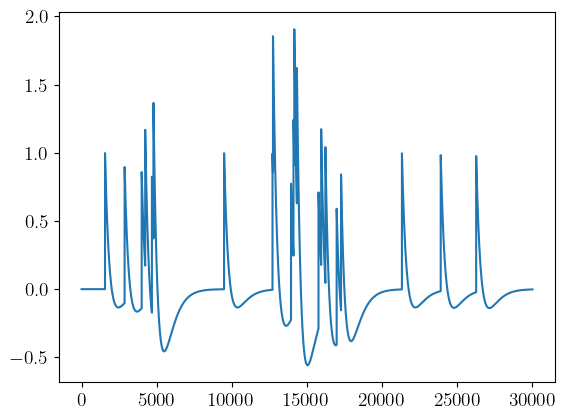

In [14]:
plt.plot(acceleromter.flatten())



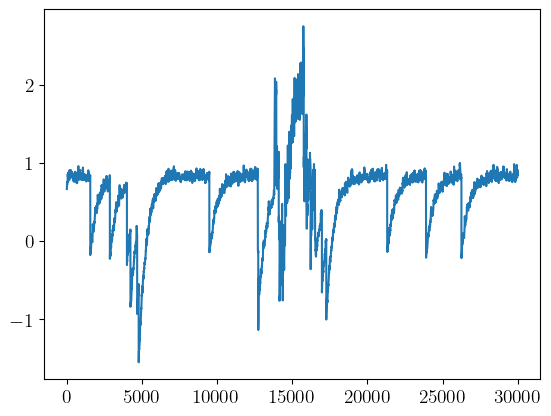

In [15]:
plt.plot(50 * f.flatten() - rate_approx.flatten())

In [45]:
spike_times = np.array([0.1, 0.8, 1.7, 2.1, 2.12, 2.15]) * 1e3
spike_times_alt = np.array([0.1, 0.8, 1.7, 2.1, 2.12, 2.15, 2.3, 2.45, 2.6, 2.7, 2.8, 2.85]) * 1e3

dt = 1
tau = 200

time_points = np.arange(0, 2.9 * 1e3, 1)

In [46]:
spike_rate_estimate = np.zeros_like(time_points)
spike_rate_estimate_alt = np.zeros_like(time_points)

In [47]:
for i, time in enumerate(time_points):
    if i == 0:
        continue
    spike_rate_estimate[i] = (1 - dt / tau) *  spike_rate_estimate[i-1]

    if time in spike_times:
        spike_rate_estimate[i] += 1
        

In [48]:
for i, time in enumerate(time_points):
    if i == 0:
        continue
    spike_rate_estimate_alt[i] = (1 - dt / tau) *  spike_rate_estimate_alt[i-1]

    if time in spike_times_alt:
        spike_rate_estimate_alt[i] += 1

In [49]:
start = 2150

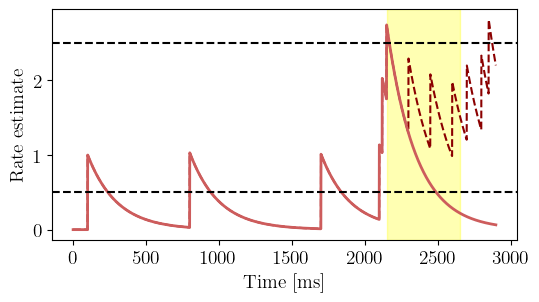

In [51]:
plt.figure(figsize=(6,3))
plt.plot(time_points, spike_rate_estimate_alt, c='darkred', ls='--')
plt.plot(time_points, spike_rate_estimate, c='indianred', lw=2)
plt.axhline(2.5, ls='--', c='k')
plt.axhline(0.5, ls='--', c='k')
plt.axvspan(start, start + 500, color='yellow', alpha=0.3)
plt.xlabel('Time [ms]')
plt.ylabel('Rate estimate')
plt.savefig('dSpike_onset.png')

In [46]:
spike_rate_estimate

array([0.        , 0.        , 0.        , ..., 0.22821312, 0.22707206,
       0.2259367 ], shape=(2000,))

In [133]:
# Generate movement

n_tiles = 100
n_time_steps = 100

grid = np.zeros((n_tiles, n_tiles, n_time_steps))

np.meshgrid(grid)

(array([0., 0., 0., ..., 0., 0., 0.], shape=(1000000,)),)